## Generating Feature spaces

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import Distributions as dist


## Compute the auto-correlation function

1. The standard way of computing th 2-point correlation function (a function of separation) is:
$$\tilde{\epsilon}(r) = \frac{N_{PR}}{N_{DP}} \frac{DD(r)}{RR(r)} -1 $$

Here $ N_{PR} $ and $ N_{PR} $ refere to the total number of pairs in a uniformly distributed data and in the catalog data; and; $ DD(r)$ and $RR(r)$ referer to the number at points per separation r in the data and  in the unform sample

In [ ]:
def compute_pairwise_distances(points):
    """
    Compute the pairwise distances between all points.

    Args:
        points (np.ndarray): 2D array of points (n_points, 2).

    Returns:
        distances (np.ndarray): 1D array of pairwise distances.
    """
    n_points = len(points)
    distances = []
    
    # Loop over all pairs of points
    for i in range(n_points):
        for j in range(i + 1, n_points):
            # Compute Euclidean distance between points i and j
            dist = np.linalg.norm(points[i] - points[j])
            distances.append(dist)
    
    return np.array(distances)


# Computes the number of pairs per separation
def pairs_per_separation(distances, n_bins, max_distance):
    
    max_distance= max(distances)

    pairs_per_interval, bin_edges = np.histogram(distances, bins=n_bins, range=(0, max_distance))

        
    # Compute bin centers
    separation = 0.5 * (bin_edges[1:] + bin_edges[:-1])


    
    return separation, pairs_per_interval


#Computoing the actual 2-point correlation function

def standard_2_point(pairs_per_distance_in_data, pairs_per_distance_in_uniform,n_points,n_uniform_points):
    ##Compute the total number of computeed pairs in each of the distributions( random and data)
    
    N_dp = n_points*(n_points-1)/2
    N_pr = n_uniform_points*(n_uniform_points-1)/2

    #Compute the two point correlation

    two_point = (N_pr/N_dp)*(pairs_per_distance_in_data/pairs_per_distance_in_uniform) - 1
    
        
    
    return two_point

## Computeing the Landy-Szalay auto-correlation function

1. The Landy-Szalay (1993) method of computing th 2-point correlation function (a function of separation) is:
$$\tilde{\epsilon_{LS}}(r) = c_1 \frac{DD(r)}{RR(r)} - c_2\frac{DR(r)}{RR(r)} -1 $$

 $ DD(r)$ is the number of pairs per bin in data 
 
 $RR(r)$  is the number of pairs per bin in a uniform distribution
 
 $DR(r)$ is the number of pais between the data and the uniform distribution
 

$c_1$ := $\frac{N_R(N_R-1)}{N_D(N_D - 1)}$ and 
$c_2$ := $\frac{2N_R (N_R -1)}{N_DN_R}$

In [23]:
## compute cross pairwise distances
def compute_cross_distances(data_points,random_points):
 
    n_points = len(points)
    n_random_points = len(random_points)
    distances = []
    
    # Loop over all pairs of points
    for i in range(n_points):
        for j in range(random_points):
            # Compute Euclidean distance between points i and j
            dist = np.linalg.norm(points[i] - random_points[j])
            distances.append(dist)
    
    return np.array(distances)


def Landy_Szalay(DD_r,RR_r,DR_r,n_points,n_uniform_points):
    ##Compute the total number of computeed pairs in each of the distributions( random and data)
    
    c_1 = (n_uniform_points*(n_uniform_points-1))/(n_points*(n_points - 1))
    
    c_2 = (2*(n_uniform_points*(n_uniform_points-1)))/(n_points*n_uniform_points)
        
    

    #Compute the two point correlation

    two_point = c_1 *(DD_r/RR_r) - c2*(DR_r/RR_r) - 1
    
        
    
    return two_point

In [24]:
# Step 4: Plot the 2-point autocorrelation function
def plot_autocorrelation_2d(separation, correlation):
    """
    Plot the 2-point autocorrelation function.

    Args:
        bin_centers (np.ndarray): Bin centers for the autocorrelation.
        correlation (np.ndarray): Autocorrelation values in each bin.
    """
    plt.plot(separation, correlation, marker='o')
    plt.title('2-point Autocorrelation Function on a uniform sample of points on a 100 by 100 grid')
    plt.xlabel('Separation')
    plt.ylabel('Frequency of separation')
    plt.grid(False)
    plt.show()

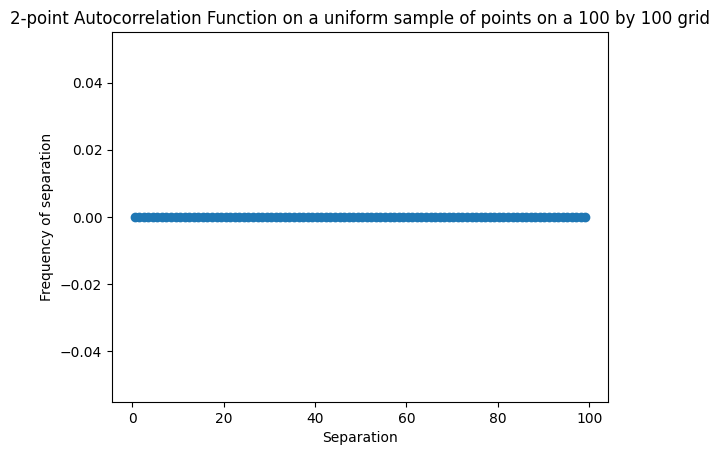

In [25]:
n_uniform_points_1 = 1000
grid_size = 100
n_bins = 100
max_distance = 100


uniform_points_disk = generate_points_on_disk(grid_size/2, n_uniform_points_1)

#points = generate_random_points_2d(n_points, grid_size)

distances = compute_pairwise_distances(uniform_points_disk)

separation, uniform_correlation = pairs_per_separation(distances, n_bins, max_distance = None)


n_uniform_points_2 = 1000
grid_size = 100
n_bins = 100
max_distance = 100


#points = generate_points_on_disk(grid_size/2, n_points)

uniform_points = generate_random_points_2d(n_uniform_points_2, grid_size)

#distances = compute_pairwise_distances(points)

separation, uniform_correlation_2 = pairs_per_separation(distances, n_bins, max_distance = None)


two_point_correlation = standard_2_point(uniform_correlation, uniform_correlation_2,n_uniform_points_1,n_uniform_points)


plot_autocorrelation_2d(separation, two_point_correlation)

## The 2 point correlation function of points sampled from 2 gaussians

In [38]:

dimensions = 2  
mean_range = (0, 100)
cov_range = (-10, 10)  
num_samples = 3 
points_per_gaussian = 500
n_points = points_per_gaussian*num_samples

means, covariances = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples)

#Creating a feature space samples from Gaussians

gaussian_space = generate_gaussian_points(means[0], covariances[0],points_per_gaussian)
for mean,covariance in zip(means[1:],covariances[1:]):
    
    gaussian_space = np.concatenate((gaussian_space,generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)

scatter_points(gaussian_space)

AttributeError: module 'Distributions' has no attribute 'sample_means_and_covariances'

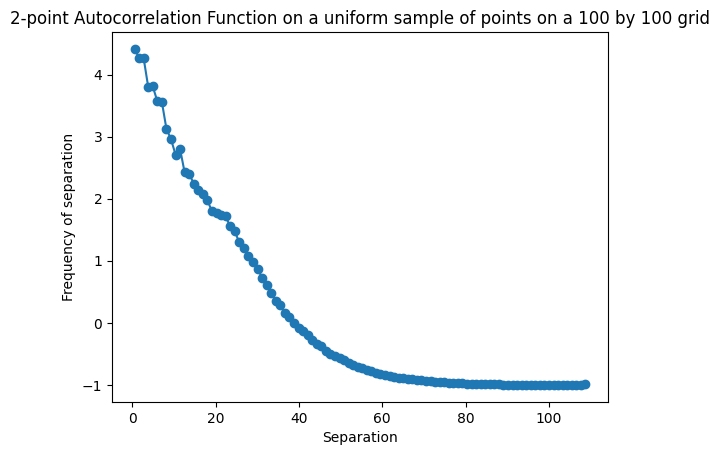

In [19]:
distances = compute_pairwise_distances(gaussian_space)

separation, correlation = pairs_per_separation(distances, n_bins, max_distance)

#Computing the 2-point correlation function
two_point_correlation = standard_2_point(correlation, uniform_correlation,n_points,n_uniform_points)

plot_autocorrelation_2d(separation, two_point_correlation)

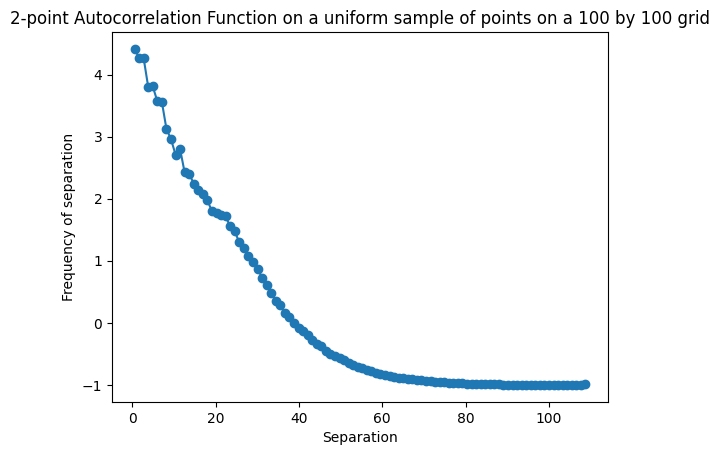

In [ ]:
#Computing the Land-Szalay correlation function
distances = compute_cross_distances(points,

separation, correlation = pairs_per_separation(distances, n_bins, max_distance)

#Computing the 2-point correlation function
two_point_correlation = Landy_Szalay(

plot_autocorrelation_2d(separation, two_point_correlation)